In [4]:
#!pip install sounddevice

     |████████████████████████████████| 107 kB 2.2 MB/s eta 0:00:01


In [42]:
import sounddevice as sd
import numpy as np
from scipy.io import wavfile
from scipy import signal

##this records, and if we gotta make some test data we do it here. 
sample_rate=24000
duration = 5  # seconds
myrecording = sd.rec(duration * sample_rate, samplerate=sample_rate, channels=1,dtype='float64')
print("Recording Audio")
sd.wait()
print("Audio recording complete , Play Audio")



Recording Audio
Audio recording complete , Play Audio


In [177]:
##bleep for the loop
b_sample, b_data = wavfile.read('long_beep.wav')
sd.play(b_data, b_sample)

In [43]:
myrecording.shape

(120000, 1)

In [44]:
sd.play(myrecording, sample_rate)
sd.wait()

In [34]:
frequencies, times, spectrogram = signal.spectrogram(myrecording.squeeze(), sample_rate)

In [35]:
spectrogram.shape

(129, 535)

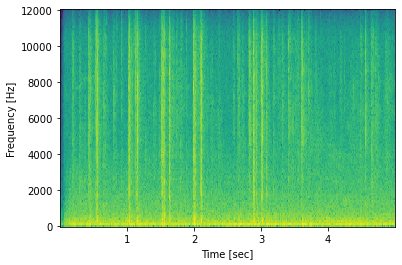

In [45]:
import matplotlib.pyplot as plt


plt.pcolormesh(times, frequencies, np.log(spectrogram)) ##log makes it prettier. for whatever reason.
#plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [46]:
spectrogram.shape

(129, 535)

In [201]:
##blocksize works if it is size sample_rate
##out
def stream_microphone(duration=5, sample_rate=24000, channels=1,block_duration = 100, output_window = 50, bleep_file = 'short_beep.wav'):
    """
    block duration is number of miliseconds at which it samples and runs inference
    
    output window is a hyper parameter that is the t step for the model.
    
    beep file right now is either 'long_beep.wav' or 'short_beep.wav'
    
    Stream audio from the microphone for a given duration.

    Args:
        duration (float): Duration of the audio stream in seconds (default: 10).
        sample_rate (int): Sampling rate in Hz (default: 44100).
        channels (int): Number of audio channels (default: 1).

    Returns:
        numpy.ndarray: An array of shape (samples, channels) containing the audio data.
        
    """
    b_sample, b_data = wavfile.read(bleep_file)
    
    # Calculate the number of samples based on the duration and sample rate.
    num_samples = int(duration * sample_rate)

    # Create an empty numpy array to store the audio data.
    zero_pad = int(sample_rate * block_duration * output_window / 10000)
    #model_input = np.array([], dtype=np.float32)
    model_input = np.zeros(zero_pad,dtype=np.float32)
    
    def callback(indata, frames, time, status):
        nonlocal model_input
        if status:
            print(status)
        model_input = np.append(model_input, indata.copy())  
        _, _, spectrogram = signal.spectrogram(model_input[-zero_pad:].squeeze(), sample_rate)
        inference_input = spectrogram[:,-output_window:]
        print(inference_input.shape)
        ##make inference here
        ## this if will be the result fo the inference.  
        ##print(len(model_input))
        if len(model_input) in [40800,45600,64800,69600,74400]:
            sd.play(b_data, b_sample)
            

    with sd.InputStream( channels=1, callback=callback,
                        blocksize=int(sample_rate * block_duration / 1000),
                        samplerate=sample_rate):
        sd.sleep(int(duration * 1000))
        print("hi")
    return model_input

In [202]:
this_data = stream_microphone()

(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
(129, 50)
hi


In [203]:
this_data.shape

(112800,)

In [204]:
frequencies, times, spectrogram = signal.spectrogram(this_data.squeeze(), sample_rate)

/var/folders/hq/zz_5zb251633yqqbh6076p782zzx8q/T/ipykernel_82128/3813215352.py:1: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram)) ##log makes it prettier. for whatever reason.


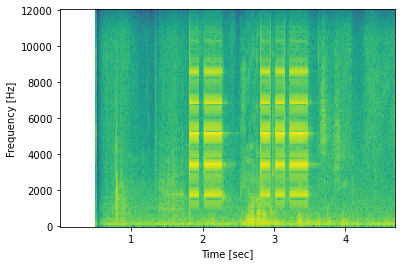

In [205]:
plt.pcolormesh(times, frequencies, np.log(spectrogram)) ##log makes it prettier. for whatever reason.
#plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [206]:
sd.play(this_data, sample_rate)
sd.wait()

In [123]:
spectrogram.shape

(129, 514)